Quick note: this workshop is designed to exactly replicate the results generated in the R workshop which follow the ISLR textbook - the purpose is to increase auditability and add an element of quality assurance.

# Setting Python up for analysis

We're going to start by setting up our analytical environment. Since python is modular this means that we will start by adding some additional tools that will make our lives easier.

Pandas is probably the most popular and versatile data analysis tool in python. We'll be doing almost all of our work using pandas, so we will import it with the "import" method. Pandas relies on some another package called "numpy", so we will also need to import that.

Numpy: http://www.numpy.org/  
Pandas: https://pandas.pydata.org/

Notice that we are giving the packages nicknames using "as" so that we can use them more easily later.

In [67]:
import numpy as np
import pandas as pd

# Setting up dataset in Python

The next step is setting up the datset that we're going to use for this workshop. Luckily the "boston" dataset that we want to use is included as part of the "sklearn" package. We need to import a specific module called "datasets".

Note how this is a different syntax from the import statements above.

In [68]:
from sklearn import datasets

We use one of the built in methods of the datasets module to import the boston dataset - we won't explain this in more detail because i/o methods are outside the scope of this lab. 

Note that the dot notation means that we're digging down in tho the heirarchy of the module to call a partiuclar method. Most modules are arranged so that similar methods are clustered together into one category.

In [69]:
boston_in = datasets.load_boston()

The boston data that we imported has two seperate components, the data and the target, essentially the suggested dependant and independent variables. We're going to start by constructing one complete dataset, but you don't really need to do that for a good proportion of the analysis we will run - many analysis functions make you specify the dependent and independent variables as seperate inputs.

Below we have demonstrated both creating a pandas dataframe and adding a column to it

Notice that to create a new pandas dataframe you actually call a methodsfrom the pandas module itself. We pass arguments indiciting the name of input data and the names of the columns (where are not included in our input dataset).

Adding a variable is simply a matter of specifying a new column name and reading in the right data.

In [63]:
boston_pd = pd.DataFrame(boston_in.data,columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'])
boston_pd['medv'] = boston_in.target

# Basic data inspection in Python

We can easily inspect the boston dataset in python in several ways.

First, we can look at the variable names using list() - in general the function of list is to convert an "iterable" into a list, but it gives the result we want here. You could also achieve this with "boston_pd.columns.tolist()". This is an example of the heirarchical dot notation discused above.

Note that we've wrapped the whole thing in a print function - this isn't necessary in this case as python usually outputs the results of the last command.

In [75]:
print(list(boston_pd))

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


Second, we can select the first 6 rows using the square brackets notation after the name of the panda dataset.

Notice that python's indexing starts at zero, and also that this statment returns everything up to but not including row at index 6.

In [71]:
boston_pd[0:6]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


Thirdly, we can use a built in method of the pandas dataset in order to display the first five rows. Notice that the "head" method ends with open brackets but doesn't take any arguements - that's quite normal for python. The brackets tell python to call the method rather than reference it; it's the difference between asking for someone to make you dinner or asking them to give you the recipe for dinner.

In [66]:
boston_pd.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Simple Linear Modelling

In order to build a simple linear model we're going to need to import the tools that we need.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#ABOVE HERE IS DONE

Running a basic Linear Model

In [36]:
# Create linear regression object
lm = smf.ols('medv ~ lstat' ,data=boston_pd).fit()

In [37]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           5.08e-88
Time:                        09:36:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Just as in R, we can select individual outputs of the OLS method. The main statistics are extracted below, and the full documentation is here:

http://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

In [38]:
print("Parameter estimates and associated statistical measures:\n")
print("Intercept:",lm.params['Intercept'],lm.bse['Intercept'], lm.tvalues['Intercept'], lm.pvalues['Intercept'],lm.conf_int(0.05)[0]["Intercept"],lm.conf_int(0.05)[1]["Intercept"])
print("lstat:",lm.params['lstat'],lm.bse['lstat'], lm.tvalues['lstat'], lm.pvalues['lstat'],lm.conf_int(0.05)[0]["lstat"],lm.conf_int(0.05)[1]["lstat"])

print("\nThe F-Statistic and associated p-value (overall significance of the model:\n")
print(lm.fvalue, lm.f_pvalue)

print("\nThe R-Squared values:\n")
print(lm.rsquared, lm.rsquared_adj)

Parameter estimates and associated statistical measures:

('Intercept:', 34.553840879383117, 0.56262735498843308, 61.415145518641729, 3.7430809409268938e-236, 33.448457040422674, 35.659224718343559)
('lstat:', -0.9500493537579906, 0.03873341621263942, -24.527899851187723, 5.0811033943882313e-88, -1.0261481995207604, -0.87395050799522078)

The F-Statistic and associated p-value (overall significance of the model:

(601.6178711098953, 5.0811033943881342e-88)

The R-Squared values:

(0.5441462975864797, 0.54324182595470683)


In [39]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'nobs',
 'normalized_cov_params',
 'outlier_test',
 'params',
 'predict',
 '

In [40]:
#Create some simulated data for predictions:
Xnew = pd.DataFrame([5,10,15],columns = ['lstat'])

ynewpred =  lm.predict(Xnew) # predict out of sample
print(ynewpred)

[ 29.80359411  25.05334734  20.30310057]


In [41]:
from scipy import stats

#                     /-------------------
# t_stat * std_er *  /            rpr_sq
#                   /  inv_ob + ----------
#                  v               sxx

# ssx = sm_x2s - sm_xs2
#                -------
#                lm.nobs


# Sum of the x^2's 
sm_x2s = ((boston_pd['lstat']**2).sum())

# Sum of the x's squared
sm_xs2 = (boston_pd['lstat'].sum())**2

# Calculating Sxx
sxx = (sm_x2s - sm_xs2/lm.nobs)

# T statistic
t_stat = stats.t.ppf(1-0.025, lm.nobs - 2)

# Standard error (square root of MSE) [tick]
std_er = lm.mse_resid**0.5

# Inverse of the nubmer of observatinos
inv_ob = (1/lm.nobs)

# Residual of the predicted value squared  [mean medv: fick]
rpr_sq = (Xnew['lstat'].values - (boston_pd['lstat'].mean()))**2

# Calculating confidence interval/2
ci = t_stat*std_er*((inv_ob  + rpr_sq/sxx)**0.5)

# Calculating prediction interval/2
pi = t_stat*std_er*((1+inv_ob  + rpr_sq/sxx)**0.5)

# Recreating confidence interval matrix
ci_pd = pd.DataFrame(ynewpred,columns=['fit'])
ci_pd['lwr'] = ynewpred-ci
ci_pd['upr'] = ynewpred+ci

# Recreating prediction interval matrix
pi_pd = pd.DataFrame(ynewpred,columns=['fit'])
pi_pd['lwr'] = ynewpred-pi
pi_pd['upr'] = ynewpred+pi

print(ci_pd)
print(pi_pd)

         fit        lwr        upr
0  29.803594  29.007412  30.599776
1  25.053347  24.474132  25.632563
2  20.303101  19.731588  20.874613
         fit        lwr        upr
0  29.803594  17.565675  42.041513
1  25.053347  12.827626  37.279068
2  20.303101   8.077742  32.528459


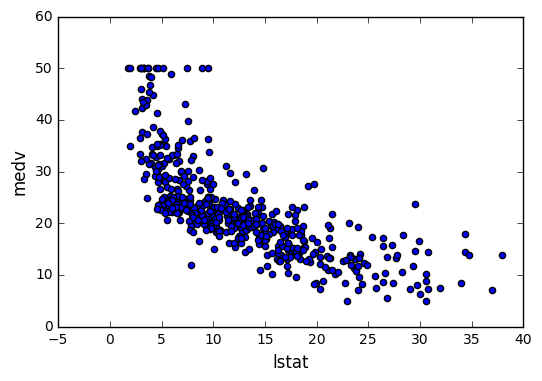

In [42]:
import matplotlib.pyplot as plt
plt.scatter(boston_pd['lstat'],boston_pd['medv'])
plt.xlabel('lstat', fontsize=12)
plt.ylabel('medv', fontsize=12)
plt.show()

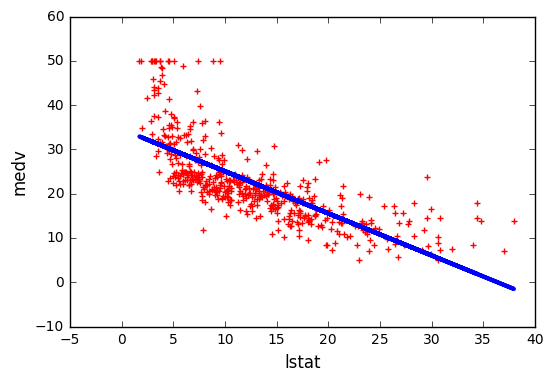

In [43]:
plt.clf()
plt.scatter(boston_pd['lstat'],boston_pd['medv'],marker="+",c="r")
plt.plot(boston_pd['lstat'],lm.fittedvalues, color='blue', linewidth=3)
plt.xlabel('lstat', fontsize=12)
plt.ylabel('medv', fontsize=12)
plt.show()

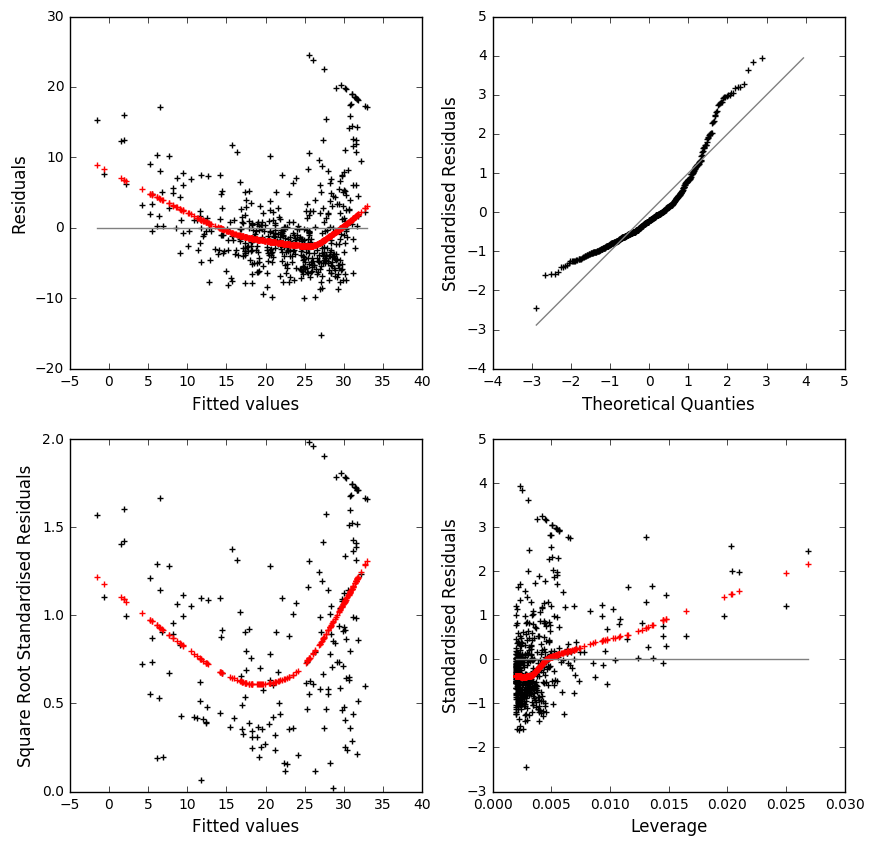

In [44]:
#Set plotsize - the below means ten inches down by ten inches across.
plt.figure(figsize=(10,10))

# Top Left
plt.subplot(221)
plt.scatter(lm.fittedvalues,lm.resid,marker="+",c="black")
plt.scatter(lm.fittedvalues,sm.nonparametric.lowess(lm.resid,lm.fittedvalues, return_sorted=False), marker="+", c='red')
plt.plot([np.min(lm.fittedvalues),np.max(lm.fittedvalues)],[0,0], color='grey', linewidth=1)
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

# Top Right
plt.subplot(222)
plt.scatter(np.sort((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm.nobs+1)))),np.sort(lm.resid_pearson),marker="+",c="black")
plt.plot([min(np.min(lm.resid_pearson),np.min(((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm.nobs+1)))))),max(np.max(lm.resid_pearson),np.max(((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm.nobs+1))))))],[min(np.min(lm.resid_pearson),np.min(((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm.nobs+1)))))),max(np.max(lm.resid_pearson),np.max(((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm.nobs+1))))))], color='grey', linewidth=1)
plt.xlabel('Theoretical Quanties', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)
                                                 
                                                  
# Bottom Left
plt.subplot(223)
plt.ylim(0.0,2.0)
plt.scatter(lm.fittedvalues,lm.resid_pearson**.5,marker="+",c="black")
plt.scatter(lm.fittedvalues,sm.nonparametric.lowess(lm.resid_pearson**.5,lm.fittedvalues, return_sorted=False), marker="+", c='red')
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Square Root Standardised Residuals', fontsize=12)


# Bottom Right
plt.subplot(224)
plt.xlim(0.00,0.03)
plt.scatter((lm.get_influence().hat_matrix_diag),lm.resid_pearson,marker="+",c="black")
plt.scatter((lm.get_influence().hat_matrix_diag),sm.nonparametric.lowess(lm.resid_pearson,(lm.get_influence().hat_matrix_diag), return_sorted=False), marker="+", c='red')
plt.plot([np.min((lm.get_influence().hat_matrix_diag)),np.max((lm.get_influence().hat_matrix_diag))],[0,0], color='grey', linewidth=1)
plt.xlabel('Leverage', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)

plt.show()

More complex and controllable plotting methods: http://matplotlib.org/examples/pylab_examples/subplots_demo.html

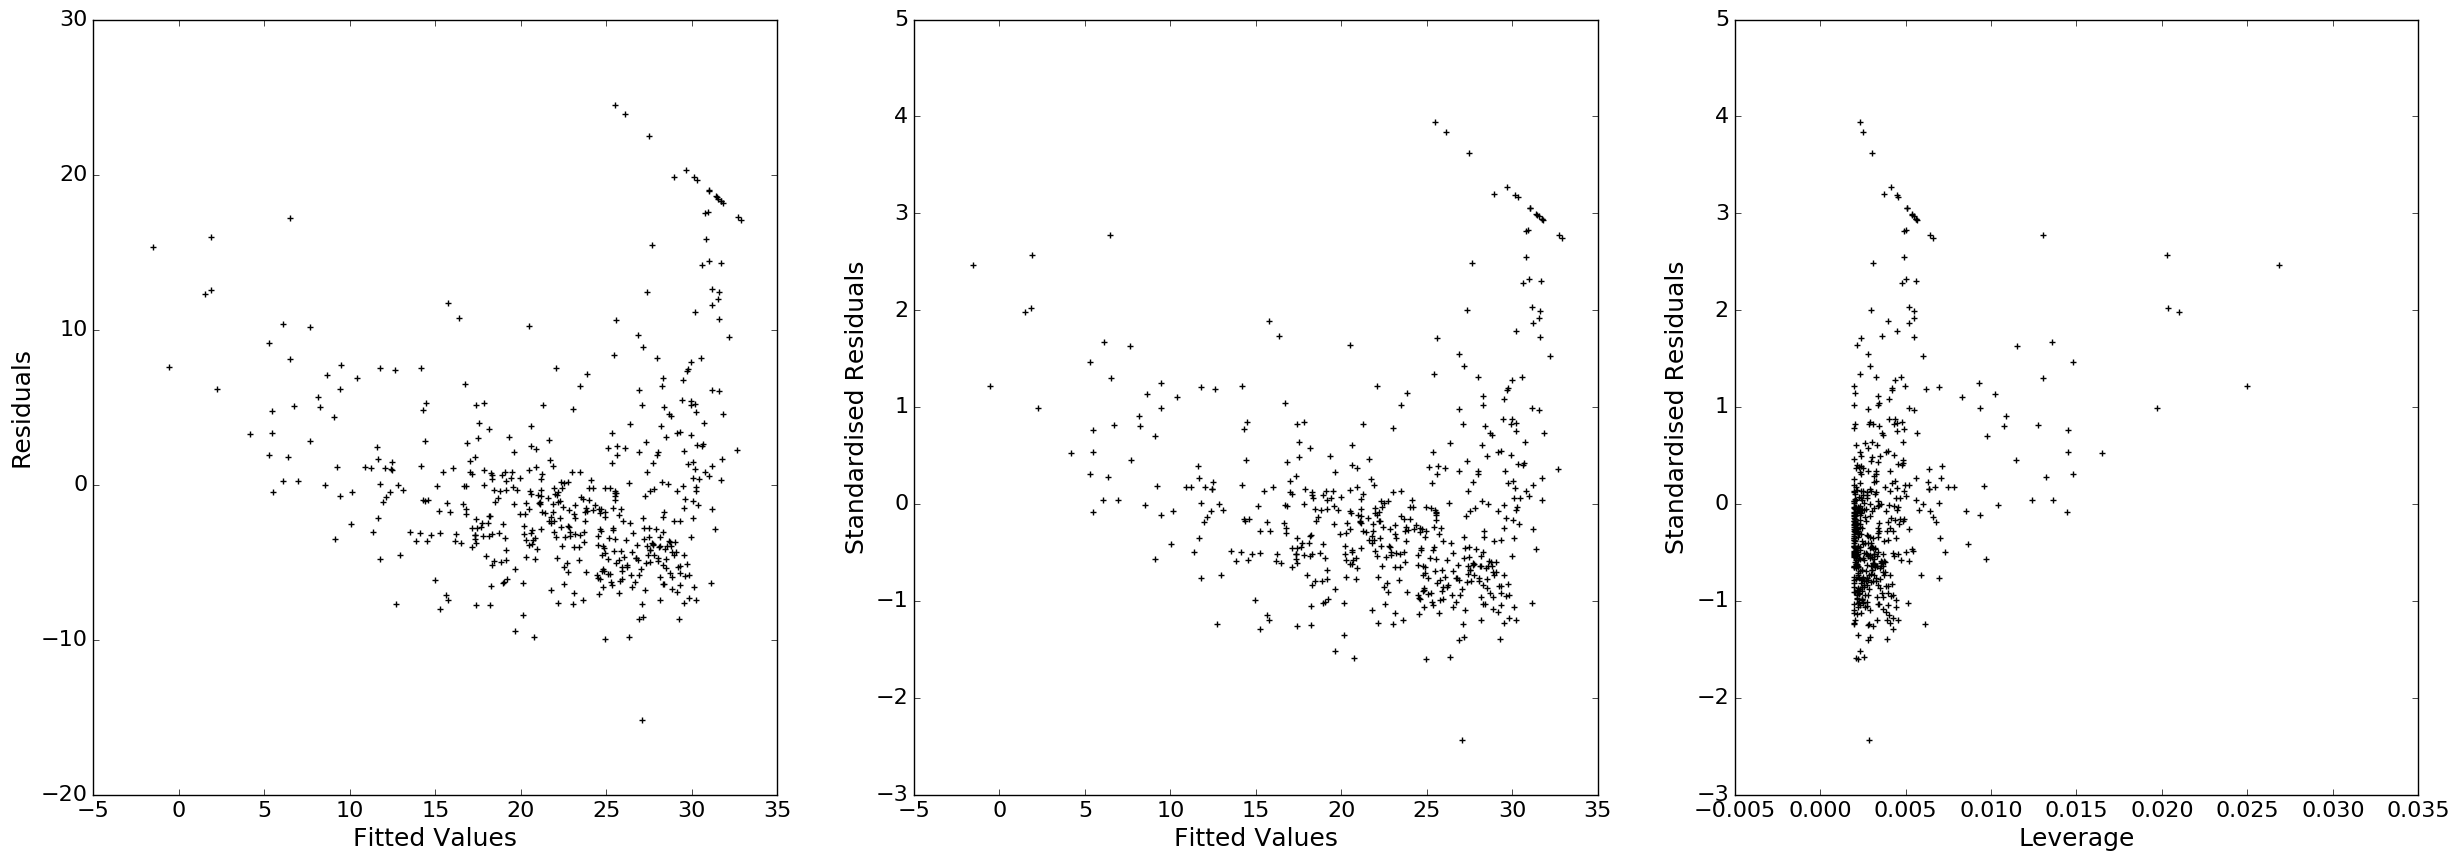

In [45]:
#Another way to arrange graphs: note the structure of subplot: (x elements, y elements, graph order). You can 

plt.figure(figsize=(30,10))

plt.subplot(131)
plt.scatter(lm.fittedvalues,lm.resid,marker="+",c="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Fitted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18)

plt.subplot(132)
plt.scatter(lm.fittedvalues,lm.resid_pearson, marker="+",c="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Fitted Values', fontsize=18)
plt.ylabel('Standardised Residuals', fontsize=18)

plt.subplot(133)
plt.scatter((lm.get_influence().hat_matrix_diag),lm.resid_pearson,marker="+",c="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Leverage', fontsize=18)
plt.ylabel('Standardised Residuals', fontsize=18)

plt.show()

In [47]:
high_lev = (lm.get_influence().hat_matrix_diag).argmax()
print("Index of highest leverage observation: %s") % high_lev

Index of highest leverage observation: 374


In [50]:
high_lev_lst = boston_pd.loc[high_lev,['lstat']]
high_lev_med = boston_pd.loc[high_lev,['medv']]
print("Vales of highest leverage observation: %0.2f lstat, %0.2f medv") % (high_lev_lst,high_lev_med)

Vales of highest leverage observation: 37.97 lstat, 13.80 medv


In [49]:
lev_max = (lm.get_influence().hat_matrix_diag)[high_lev]
print("Leverage of highest leverage observation: %0.4f ") % lev_max

Leverage of highest leverage observation: 0.0269 


# Multiple Linear Regression

We're now going to go back to the simpler split of the data into IV/DV

In [51]:
boston_DV = pd.DataFrame(boston_in.data,columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'])
boston_IV = pd.DataFrame(boston_in.target,columns = ['medv'])

Another way to run linear regressions (without using the formula api).

For the following examples, we cannot use the formula api becuase the python implimentation doesn't use "." to represent "all variables"

Notice that in this method we now have to add the constant mannually

In [14]:
lm = sm.OLS(boston_IV,sm.add_constant(boston_DV)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        09:06:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
crim          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
zn             0.0464      0.014      3.380      0.001         0.019     0.073
indus          0.0209      0.061      0.339      0.735        -0.100     0.142
chas           2.6886      0.862      3.120      0.002         0.996     4.381
nox          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
rm             3.8048      0.418      9.102      0.000         2.983     4.626
age            0.0008      0.013      0.057      0.955        -0.025     0.027
dis           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
rad            0.3057      0.066      4.608      0.000         0.175     0.436
tax           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
ptratio       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
black          0.0094      0.003      3.500      0.001         0.004     0.015
lstat         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif["Features"] = sm.add_constant(boston_DV).columns
vif["VIF Factor"] = [variance_inflation_factor(sm.add_constant(boston_DV).values, i) for i in range(len(vif["Features"]))]

NameError: name 'boston_DV' is not defined

In [ ]:
print(vif)

In the R version of this code, we demonstrated subtracting variables from the "." (all variables) symbol, and also updating an existing model:

lm.fit1=lm(medv~.-age,data=Boston)
lm.fit1=update(lm.fit, ~.-age)

These functions do not exist in python, but the first can easily be replicated:

In [16]:
lm = sm.OLS(boston_IV,sm.add_constant(boston_DV).drop(["age"], axis=1)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          6.28e-136
Time:                        09:06:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4666      5.081      7.177      0.000        26.483    46.450
crim          -0.1072      0.033     -3.279      0.001        -0.171    -0.043
zn             0.0463      0.014      3.401      0.001         0.020     0.073
indus          0.0209      0.061      0.340      0.734        -0.100     0.142
chas           2.6911      0.860      3.130      0.002         1.002     4.380
nox          -17.7382      3.680     -4.820      0.000       -24.969   -10.508
rm             3.8097      0.409      9.325      0.000         3.007     4.612
dis           -1.4791      0.191     -7.758      0.000        -1.854    -1.104
rad            0.3054      0.066      4.622      0.000         0.176     0.435
tax           -0.0123      0.004     -3.281      0.001        -0.020    -0.005
ptratio       -0.9529      0.130     -7.313      0.000        -1.209    -0.697
black          0.0094      0.003      3.515      0.000         0.004     0.015
lstat         -0.5245      0.048    -11.018      0.000        -0.618    -0.431
==============================================================================
Omnibus:                      178.356   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.541
Skew:                           1.523   Prob(JB):                    2.64e-171
Kurtosis:                       8.289   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interaction Terms

In [17]:
# Create linear regression object with interactions
lm_int = smf.ols('medv ~ lstat * age' ,data=boston_pd).fit()
lm_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           4.86e-88
Time:                        09:06:30   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000        33.201    38.976
lstat         -1.3921      0.167     -8.313      0.000        -1.721    -1.063
age           -0.0007      0.020     -0.036      0.971        -0.040     0.038
lstat:age      0.0042      0.002      2.244      0.025         0.001     0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
selected_DV = sm.add_constant(boston_DV.loc[:, ["lstat","age"]])
selected_DV["lstat*age"] = boston_DV.loc[:, ["lstat"]].values*boston_DV.loc[:, ["age"]].values

lm = sm.OLS(boston_IV,selected_DV).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           4.86e-88
Time:                        09:06:30   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.000        33.201    38.976
lstat         -1.3921      0.167     -8.313      0.000        -1.721    -1.063
age           -0.0007      0.020     -0.036      0.971        -0.040     0.038
lstat*age      0.0042      0.002      2.244      0.025         0.001     0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Non-linear Transformations of the Predictors

In [19]:
selected_DV = sm.add_constant(boston_DV.loc[:, ["lstat"]])
selected_DV["lstat*^2"] = boston_DV.loc[:, ["lstat"]].values**2

lm2 = sm.OLS(boston_IV,selected_DV).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          1.56e-112
Time:                        09:06:31   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000        41.149    44.575
lstat         -2.3328      0.124    -18.843      0.000        -2.576    -2.090
lstat*^2       0.0435      0.004     11.628      0.000         0.036     0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
selected_DV = sm.add_constant(boston_DV.loc[:, ["lstat"]])
lm = sm.OLS(boston_IV,selected_DV).fit()

table = sm.stats.anova_lm(lm,lm2)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


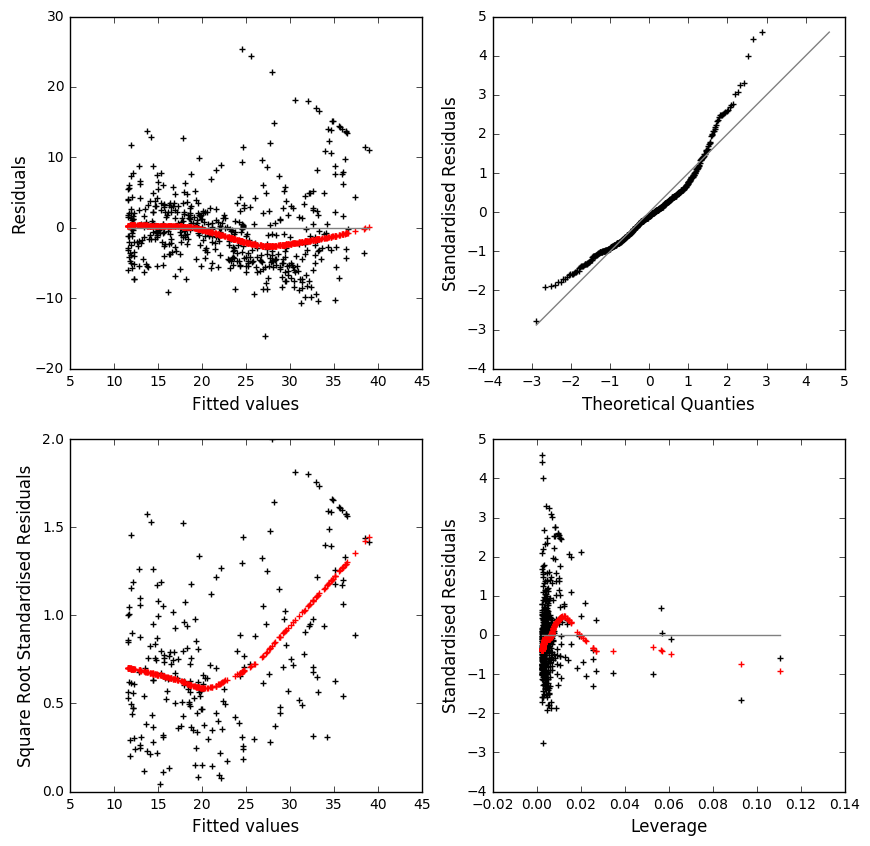

In [21]:
#Set plotsize - the below means ten inches down by ten inches across.
plt.figure(figsize=(10,10))

# Top Left
plt.subplot(221)
plt.scatter(lm2.fittedvalues,lm2.resid,marker="+",c="black")
plt.scatter(lm2.fittedvalues,sm.nonparametric.lowess(lm2.resid,lm2.fittedvalues, return_sorted=False), marker="+", c='red')
plt.plot([np.min(lm2.fittedvalues),np.max(lm2.fittedvalues)],[0,0], color='grey', linewidth=1)
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

# Top Right
plt.subplot(222)
plt.scatter(np.sort((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm2.nobs+1)))),np.sort(lm2.resid_pearson),marker="+",c="black")
plt.plot([min(np.min(lm2.resid_pearson),np.min(((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm2.nobs+1)))))),max(np.max(lm2.resid_pearson),np.max(((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm2.nobs+1))))))],[min(np.min(lm2.resid_pearson),np.min(((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm2.nobs+1)))))),max(np.max(lm2.resid_pearson),np.max(((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm2.nobs+1))))))], color='grey', linewidth=1)
plt.xlabel('Theoretical Quanties', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)
                                                 
                                                  
# Bottom Left
plt.subplot(223)
plt.ylim(0.0,2.0)
plt.scatter(lm2.fittedvalues,lm2.resid_pearson**.5,marker="+",c="black")
plt.scatter(lm2.fittedvalues,sm.nonparametric.lowess(lm2.resid_pearson**.5,lm2.fittedvalues, return_sorted=False), marker="+", c='red')
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Square Root Standardised Residuals', fontsize=12)


# Bottom Right
plt.subplot(224)
plt.scatter((lm2.get_influence().hat_matrix_diag),lm2.resid_pearson,marker="+",c="black")
plt.scatter((lm2.get_influence().hat_matrix_diag),sm.nonparametric.lowess(lm2.resid_pearson,(lm2.get_influence().hat_matrix_diag), return_sorted=False), marker="+", c='red')
plt.plot([np.min((lm2.get_influence().hat_matrix_diag)),np.max((lm2.get_influence().hat_matrix_diag))],[0,0], color='grey', linewidth=1)
plt.xlabel('Leverage', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)

#how to plot cooks distnace 0.5 and 1 lines?

plt.show()

In [22]:
selected_DV = sm.add_constant(boston_DV.loc[:, ["lstat"]])
selected_DV["lstat*^2"] = boston_DV.loc[:, ["lstat"]].values**2
selected_DV["lstat*^3"] = boston_DV.loc[:, ["lstat"]].values**3
selected_DV["lstat*^4"] = boston_DV.loc[:, ["lstat"]].values**4
selected_DV["lstat*^5"] = boston_DV.loc[:, ["lstat"]].values**5

lm = sm.OLS(boston_IV,selected_DV).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          8.73e-122
Time:                        09:07:01   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         67.6997      3.604     18.783      0.000        60.618    74.781
lstat        -11.9911      1.526     -7.859      0.000       -14.989    -8.994
lstat*^2       1.2728      0.223      5.703      0.000         0.834     1.711
lstat*^3      -0.0683      0.014     -4.747      0.000        -0.097    -0.040
lstat*^4       0.0017      0.000      4.143      0.000         0.001     0.003
lstat*^5   -1.632e-05   4.42e-06     -3.692      0.000      -2.5e-05 -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
import math

selected_DV = pd.DataFrame()
selected_DV["log(rn)"] = (boston_DV["rm"]).apply(math.log)

lm = sm.OLS(boston_IV,sm.add_constant(selected_DV)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           1.22e-64
Time:                        09:07:02   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -76.4878      5.028    -15.213      0.000       -86.366   -66.610
log(rn)       54.0546      2.739     19.732      0.000        48.672    59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Qualitative Predictors

The Carseats data used in the parallel R workshop as part of the ISLR textbook package - this isn't straightforwardly available for python, so we're just going to download the data

In [24]:
Carseats = pd.read_csv('carseats.csv').drop(pd.read_csv('carseats.csv').columns[0], axis=1)
print(Carseats.head())
print(list(Carseats))

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']


In [25]:
Carseats_IV = Carseats.loc[:, ["Sales"]]
Carseats_DV = Carseats.loc[:, ["CompPrice","Income","Advertising","Population","Price","Age","Education"]]

Carseats_USd = pd.get_dummies(Carseats["US"], prefix='US').drop(pd.get_dummies(Carseats["US"], prefix='US').columns[0], axis=1)
Carseats_Urband = pd.get_dummies(Carseats["Urban"], prefix='Urban').drop(pd.get_dummies(Carseats["Urban"], prefix='Urban').columns[0], axis=1)
Carseats_ShelveLocd = pd.get_dummies(Carseats["ShelveLoc"], prefix='ShelveLoc').drop(pd.get_dummies(Carseats["ShelveLoc"], prefix='ShelveLoc').columns[0], axis=1)

Carseats_DV = pd.concat([Carseats_DV, Carseats_USd,Carseats_Urband,Carseats_ShelveLocd], axis=1)

In [26]:
selected_DV = sm.add_constant(Carseats_DV)
selected_DV["Income:Advertising"] = Carseats_DV.loc[:, ["Income"]].values*Carseats_DV.loc[:, ["Advertising"]].values
selected_DV["Price:Age"] = Carseats_DV.loc[:, ["Price"]].values*Carseats_DV.loc[:, ["Age"]].values

lm = sm.OLS(Carseats_IV,selected_DV).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          6.14e-166
Time:                        09:07:05   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                  6.5756      1.009      6.519      0.000         4.592     8.559
CompPrice              0.0929      0.004     22.567      0.000         0.085     0.101
Income                 0.0109      0.003      4.183      0.000         0.006     0.016
Advertising            0.0702      0.023      3.107      0.002         0.026     0.115
Population             0.0002      0.000      0.433      0.665        -0.001     0.001
Price                 -0.1008      0.007    -13.549      0.000        -0.115    -0.086
Age                   -0.0579      0.016     -3.633      0.000        -0.089    -0.027
Education             -0.0209      0.020     -1.063      0.288        -0.059     0.018
US_Yes                -0.1576      0.149     -1.058      0.291        -0.450     0.135
Urban_Yes              0.1402      0.112      1.247      0.213        -0.081     0.361
ShelveLoc_Good         4.8487      0.153     31.724      0.000         4.548     5.149
ShelveLoc_Medium       1.9533      0.126     15.531      0.000         1.706     2.201
Income:Advertising     0.0008      0.000      2.698      0.007         0.000     0.001
Price:Age              0.0001      0.000      0.801      0.424        -0.000     0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
print(pd.concat([Carseats["US"], pd.get_dummies(Carseats["US"], prefix='US')], axis=1).drop_duplicates())
print(pd.concat([Carseats["Urban"], pd.get_dummies(Carseats["Urban"], prefix='Urban')], axis=1).drop_duplicates())
print(pd.concat([Carseats["ShelveLoc"], pd.get_dummies(Carseats["ShelveLoc"], prefix='ShelveLoc')], axis=1).drop_duplicates())

    US  US_No  US_Yes
0  Yes    0.0     1.0
4   No    1.0     0.0
  Urban  Urban_No  Urban_Yes
0   Yes       0.0        1.0
5    No       1.0        0.0
  ShelveLoc  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium
0       Bad            1.0             0.0               0.0
1      Good            0.0             1.0               0.0
2    Medium            0.0             0.0               1.0
